# Plot Generator

This notebook generates the plots pertaining to most of the scripts using canonical result files which are stored in `*/cv-channel/notebook/plot_data`.
The first cell must be run. All other subsections may be run completely independently. A nice list of color schemes can be found [here](http://docs.juliaplots.org/latest/generated/colorschemes/).

In [1]:
using Plots
using DelimitedFiles
if Sys.iswindows()
    file_base = pwd()*"\\plot_data\\"
else
    file_base = pwd()*"/plot_data/"
end
gr(size=(500,500), html_output_format=:png); #This seems to fix tiny plots if that is an issue you have
init_color_scheme = :seaborn_bright; #Seemed useful to make this global

## Werner-Holevo Channel Results

### Multi-Copy Werner-Holevo PPT Communication Value

In [2]:
file_to_read = file_base*"multi-copy-werner-holevo-script-data.csv"
data = readdlm(file_to_read, ',');

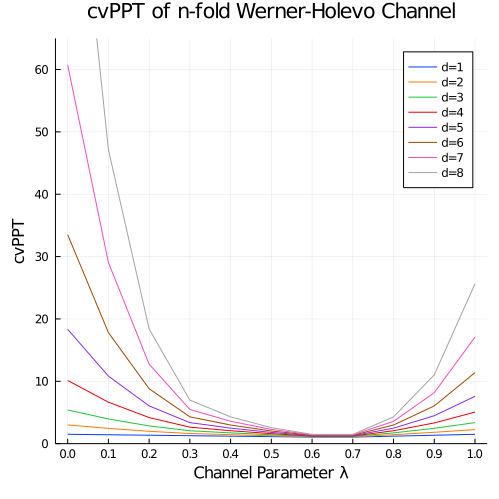

In [3]:
x_axis = data[1,2:12]
comm_values = hcat(data[2,2:12],data[3,2:12])
for j in [4:9;]
    comm_values = hcat(comm_values, data[j,2:12])
end
comm_values = convert(Array{Float64}, comm_values)
title_set = "cvPPT of n-fold Werner-Holevo Channel"
label_set = ["d=1" "d=2" "d=3" "d=4" "d=5" "d=6" "d=7" "d=8"]
x_tick_set = (0:0.1:1)
y_lim_set = (0,65)
plot(x_axis,
    comm_values,
    title = title_set,
    label = label_set,
    xlabel = "Channel Parameter λ",
    ylabel = "cvPPT",
    xtick = x_tick_set,
    ylims = y_lim_set,
    palette = init_color_scheme
)

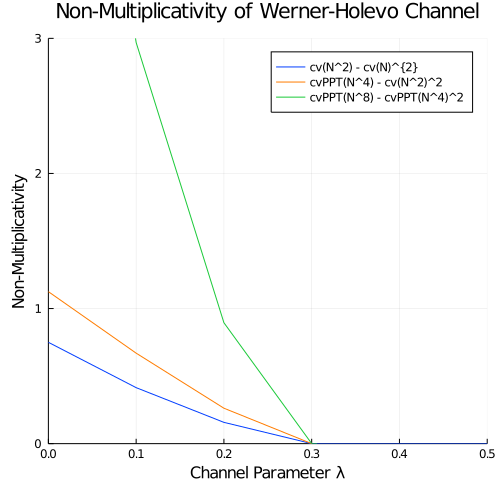

In [4]:
x_axis = data[1,2:12]
mult_values = hcat(hcat(data[12,2:12],data[13,2:12]),data[14,2:12]);
mult_values = convert(Array{Float64},mult_values)
title_set = "Non-Multiplicativity of Werner-Holevo Channel"
label_set = ["cv(N^2) - cv(N)^{2}" "cvPPT(N^4) - cv(N^2)^2" "cvPPT(N^8) - cvPPT(N^4)^2"]
x_tick_set = (0:0.1:1)
x_lim_set = (0,0.5)
y_lim_set = (0,3)
plot(x_axis,
    mult_values,
    title = title_set,
    label = label_set,
    xlabel = "Channel Parameter λ",
    ylabel = "Non-Multiplicativity",
    xtick = x_tick_set,
    ylims = y_lim_set,
    xlims = x_lim_set,
    palette = init_color_scheme
)

### Multi-Copy Werner-Holevo Dimension Scaling

In [5]:
file_to_read = file_base*"multi-copy-werner-holevo-dimension-scaling-data.csv"
data = readdlm(file_to_read, ',');

In [6]:
x_axis = data[1,2:8]
lambda_000_data = convert(Array{Float64},data[2:5,2:8]')
lambda_025_data = convert(Array{Float64},data[8:11,2:8]')
lambda_050_data = convert(Array{Float64},data[14:17,2:8]')

title_set_000 = "cvPPT of n-fold Werner-Holevo channel for λ=0"
title_set_025 = "cvPPT of n-fold Werner-Holevo channel for λ=0.25"
title_set_050 = "cvPPT of n-fold Werner-Holevo channel for λ=0.5"
label_set = ["n=1" "n=2" "n=3" "n=4"]
x_label = "Input dimension (d)"
y_label = "cvPPT";

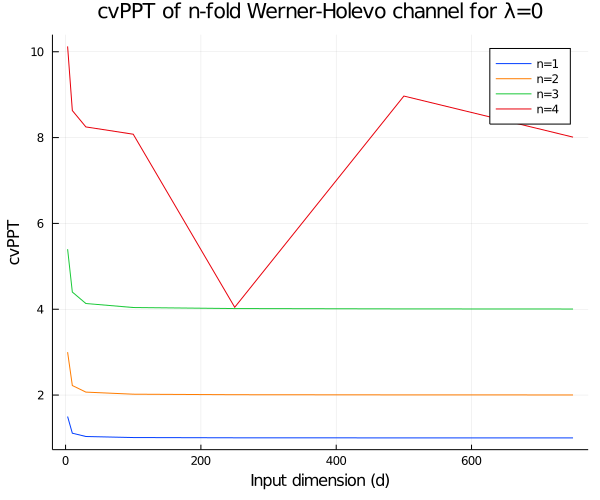

In [7]:
gr(size=(600,500), html_output_format=:png);
plot(x_axis,
    lambda_000_data,
    title = title_set_000,
    label = label_set,
    xlabel = x_label,
    ylabel = y_label,
    palette = init_color_scheme
)

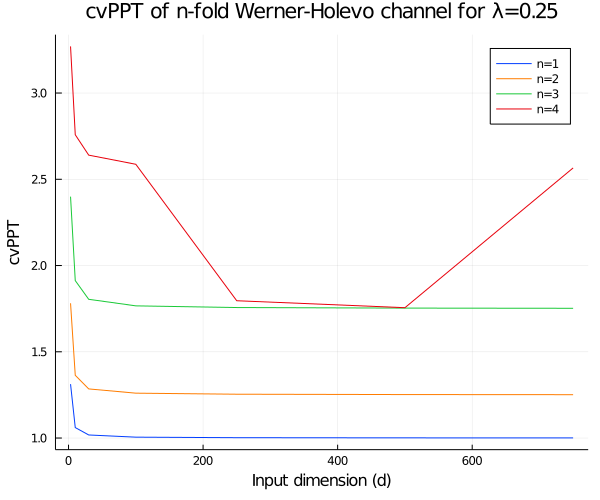

In [8]:
gr(size=(600,500), html_output_format=:png);
plot(x_axis,
    lambda_025_data,
    title = title_set_025,
    label = label_set,
    xlabel = x_label,
    ylabel = y_label,
    palette = init_color_scheme
)

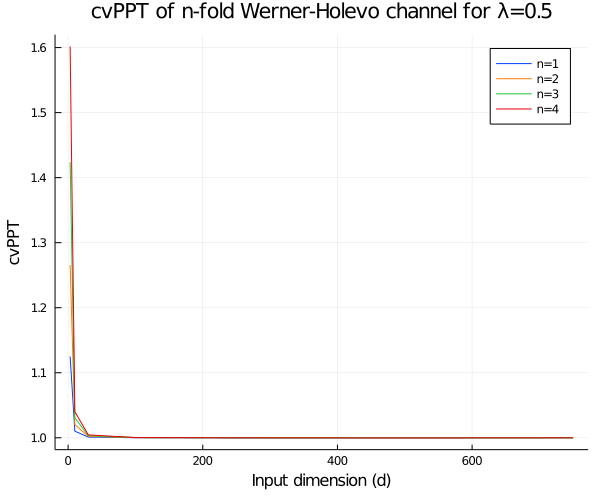

In [9]:
gr(size=(600,500), html_output_format=:png);
plot(x_axis,
    lambda_050_data,
    title = title_set_050,
    label = label_set,
    xlabel = x_label,
    ylabel = y_label,
    palette = init_color_scheme
)

## Other Channel Results